# 1. Creating Datasets

In [1]:
from settings import TRAIN_NAME, VALIDATION_NAME, BATCH_SIZE

In [2]:
from model.dataset import FreiHANDDataset, FreiHANDDataLoader

Training set

In [3]:
train_dataset = FreiHANDDataset(set_type=TRAIN_NAME)
train_dataset

FreiHAND [Training - 26000 items]

In [4]:
train_dataloader = FreiHANDDataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    num_workers=2
)
train_dataloader

FreiHANDDataLoader [Training - Batch size: 48 - Length: 541]

Validation set

In [5]:
val_dataset = FreiHANDDataset(set_type=VALIDATION_NAME)
val_dataset

FreiHAND [Validation - 5000 items]

In [6]:
val_dataloader = FreiHANDDataLoader(
    dataset=val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    num_workers=2
)
val_dataloader

FreiHANDDataLoader [Validation - Batch size: 48 - Length: 104]

# 2. Models

In [7]:
from settings import DEVICE, N_EPOCHS, BATCHES_PER_EPOCH, BATCHES_PER_EPOCH_VAL, LEARNING_RATE

Creating the ANN:

In [8]:
from model.network import ShallowUNet

In [9]:
model = ShallowUNet(in_channel=3, out_channel=21)
model = model.to(DEVICE)

Creating the loss criterion

In [10]:
from model.network import IoULoss

In [11]:
criterion = IoULoss()
criterion

IoULoss

Creating the optimizer

In [12]:
import torch.optim as optim

In [13]:
optimizer = optim.SGD(params=model.parameters(), lr=LEARNING_RATE)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Creating the scheduler

In [14]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, factor=0.5, patience=20, verbose=True, threshold=0.00001
)
scheduler

# 3. Training

In [15]:
from model.trainer import Trainer

trainer = Trainer(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    epochs=N_EPOCHS,
    batches_per_epoch=BATCHES_PER_EPOCH,
    batches_per_epoch_val=BATCHES_PER_EPOCH_VAL,
    scheduler=scheduler
)
trainer

Trainer [Epochs: 1000; Batches per Epoch: 50; Batches per Epoch Validation: 20]

In [16]:
model = trainer.train(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader
)

Epoch: 1/1000, Train Loss=0.9928547296, Val Loss=0.9928204332
Epoch: 2/1000, Train Loss=0.9927531247, Val Loss=0.9926921158
Epoch: 3/1000, Train Loss=0.9926331604, Val Loss=0.9925618314
Epoch: 4/1000, Train Loss=0.9924837316, Val Loss=0.9924031666
Epoch: 5/1000, Train Loss=0.9922934607, Val Loss=0.9921426404
Epoch: 6/1000, Train Loss=0.9920482495, Val Loss=0.991902323
Epoch: 7/1000, Train Loss=0.9917168816, Val Loss=0.9914500344
Epoch: 8/1000, Train Loss=0.991241101, Val Loss=0.9907445283
Epoch: 9/1000, Train Loss=0.990507785, Val Loss=0.9898691035
Epoch: 10/1000, Train Loss=0.9892913839, Val Loss=0.9882430491
Epoch: 11/1000, Train Loss=0.9870085962, Val Loss=0.9854173774
Epoch: 12/1000, Train Loss=0.9822430879, Val Loss=0.9781923266
Epoch: 13/1000, Train Loss=0.9672364184, Val Loss=0.9487301395
Epoch: 14/1000, Train Loss=0.9168626292, Val Loss=0.8838380632
Epoch: 15/1000, Train Loss=0.8640363731, Val Loss=0.846518491
Epoch: 16/1000, Train Loss=0.8378149411, Val Loss=0.8196681142
Epoch

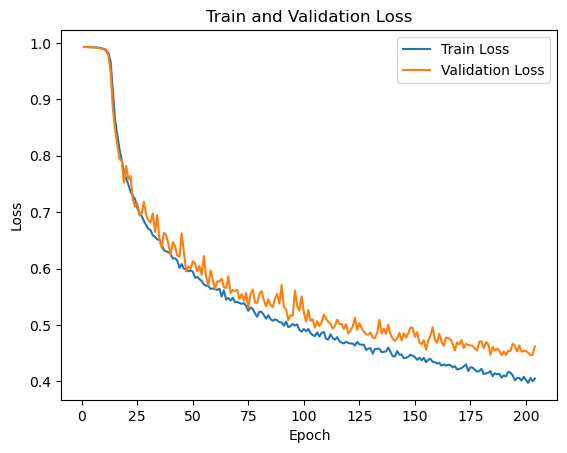

In [17]:
trainer.plot_loss()